In [3]:
# This file has exercises for Module 2 Case Study 1 - Extracting, Cleaning & Preprocessing Text
#1
import nltk
from nltk import FreqDist as fd
from nltk.tokenize import word_tokenize as wt

def tokenize(content):
    return wt(content)

content = "Lord Krishna is Awesome. Lord Krishna is Awesome. Lord Krishna is Awesome. Lord Krishna is Great. Hare Krishna Hare Ram Radhe Govinda. Lord Krishna is Awesome. Lord Krishna is Awesome. Lord Krishna is Awesome. Lord Krishna is Great. Hare Krishna Hare Ram Radhe Govinda"
text_tokens = tokenize(content)
print(text_tokens)
fq = fd(token for token in text_tokens)
common = fq.most_common()[-10:]
print(common)

['Lord', 'Krishna', 'is', 'Awesome', '.', 'Lord', 'Krishna', 'is', 'Awesome', '.', 'Lord', 'Krishna', 'is', 'Awesome', '.', 'Lord', 'Krishna', 'is', 'Great', '.', 'Hare', 'Krishna', 'Hare', 'Ram', 'Radhe', 'Govinda', '.', 'Lord', 'Krishna', 'is', 'Awesome', '.', 'Lord', 'Krishna', 'is', 'Awesome', '.', 'Lord', 'Krishna', 'is', 'Awesome', '.', 'Lord', 'Krishna', 'is', 'Great', '.', 'Hare', 'Krishna', 'Hare', 'Ram', 'Radhe', 'Govinda']
[('Krishna', 10), ('.', 9), ('Lord', 8), ('is', 8), ('Awesome', 6), ('Hare', 4), ('Great', 2), ('Ram', 2), ('Radhe', 2), ('Govinda', 2)]


Original Text
['Here', 'is', 'a', 'sample', 'text', '.', 'The', 'Universe', 'is', 'unlimited', ',', 'like', 'the', 'existence', '.', 'Here', 'is', 'a', 'sample', 'text', '.', 'The', 'Universe', 'is', 'unlimited', ',', 'like', 'the', 'existence', '.', 'Lord', 'Krishna', 'is', 'Awesome', '.', 'Lord', 'Krishna', 'is', 'Awesome', '.', 'Lord', 'Krishna', 'is', 'Awesome', '.', 'Lord', 'Krishna', 'is', 'Great', '.', 'Hare', 'Krishna', 'Hare', 'Ram', 'Radhe', 'Govinda', '.', 'Lord', 'Krishna', 'is', 'Awesome', '.', 'Lord', 'Krishna', 'is', 'Awesome', '.', 'Lord', 'Krishna', 'is', 'Awesome', '.', 'Lord', 'Krishna', 'is', 'Great', '.', 'Hare', 'Krishna', 'Hare', 'Ram', 'Radhe', 'Govinda']
Removed
['Lord', 'Krishna', 'Awesome', '.', 'Lord', 'Krishna', 'Awesome', '.', 'Lord', 'Krishna', 'Awesome', '.', 'Lord', 'Krishna', 'Great', '.', 'Hare', 'Krishna', 'Hare', 'Ram', 'Radhe', 'Govinda', '.', 'Lord', 'Krishna', 'Awesome', '.', 'Lord', 'Krishna', 'Awesome', '.', 'Lord', 'Krishna', 'Awesome', '.', '

C:\Users\SiyaPransh\AppData\Local\Temp\ipykernel_12952\2403443209.py:28: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.figure.show()


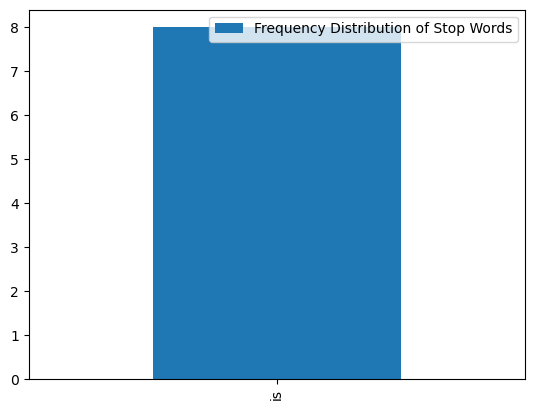

In [4]:
#2
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize as wt
import matplotlib.pyplot as plt
import pandas as pd
#nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

word_tokens = tokenize(content)

def RemoveStopWords(content):
    filtered_sentence = []
    list_of_stop_words = []
    for w in content:
        if w.lower() not in stop_words:
            filtered_sentence.append(w)
        if w.lower() in stop_words:
            list_of_stop_words.append(w)
            
    fq = fd(token.lower() for token in list_of_stop_words)
    #common = fq.most_common()
    #print(common)
    #letter_dict = dict(fd(common).most_common()) 
    letter_dict = dict(fq) 
    #print(letter_dict)
    most_common_letters = pd.DataFrame({"Frequency Distribution of Stop Words":  list(letter_dict.values())}, index=list(letter_dict.keys()))
    plt = most_common_letters.plot(kind="bar")
    plt.figure.show()
    return (filtered_sentence)

content = "Here is a sample text. The Universe is unlimited, like the existence. Here is a sample text. The Universe is unlimited, like the existence. Lord Krishna is Awesome. Lord Krishna is Awesome. Lord Krishna is Awesome. Lord Krishna is Great. Hare Krishna Hare Ram Radhe Govinda. Lord Krishna is Awesome. Lord Krishna is Awesome. Lord Krishna is Awesome. Lord Krishna is Great. Hare Krishna Hare Ram Radhe Govinda"
text_tokens = tokenize(content)
print ("Original Text")
print(text_tokens)
removed_stop_words = RemoveStopWords(text_tokens)
print ("Removed")
print(removed_stop_words)

In [5]:
#3 - Stemming
from nltk.stem import PorterStemmer
pst = PorterStemmer()
#from nltk.tokenize import word_tokenize as wt

def Stemmed(content):
        return(pst.stem(content))

content = "Give giving gave given have having had had been look looking like liking likeable"
word_tokens = tokenize(content)
#print(word_tokens)
for words in word_tokens:
    stemmed =  Stemmed(words)
    print(words + " : " , end = " ")
    print(stemmed, end = " ; ")

Give :  give ; giving :  give ; gave :  gave ; given :  given ; have :  have ; having :  have ; had :  had ; had :  had ; been :  been ; look :  look ; looking :  look ; like :  like ; liking :  like ; likeable :  likeabl ; 

In [6]:
#3 - Lemmatization
from nltk.stem import wordnet
from nltk.stem import WordNetLemmatizer
wl = WordNetLemmatizer()

def Lemmatize(content):
        return(wl.lemmatize(content))

content = "Corpora Give giving gave given have having had had been look looking like liking likeable"
word_tokens = tokenize(content)
#print(word_tokens)
for words in word_tokens:
    lemma =  Lemmatize(words)
    print(words + " : " , end = " ")
    print(lemma, end = " ; ")

Corpora :  Corpora ; Give :  Give ; giving :  giving ; gave :  gave ; given :  given ; have :  have ; having :  having ; had :  had ; had :  had ; been :  been ; look :  look ; looking :  looking ; like :  like ; liking :  liking ; likeable :  likeable ; 

In [7]:
#3 - Print all the words along with their lemmatized and Stemmed form using the above functions AND Save these results in a csv file having 3 columns

content = "Corpora Give the an it giving gave given have having had had a the an it been look looking like liking likeable"
word_tokens = tokenize(content)
#print(word_tokens)
f = open("Original, Lemmatized & Stemmed Words1.csv", "w")
f.write("Original, Lemmatized, Stemmed\n")
print("Original, Lemmatized, Stemmed")
for words in word_tokens:
    f.write(words)
    f.write(",")
    print(words, end = ",")
    lemma =  Lemmatize(words)
    f.write(lemma)
    f.write(",")
    print(lemma, end = ",")
    stemmed =  Stemmed(words)
    f.write(stemmed)
    f.write("\n")
    print(stemmed, end = "\n")
f.close()

#3 Save these results in a csv file having 3 columns
csvFile = pd.read_csv('Original, Lemmatized & Stemmed Words1.csv')
print(csvFile)

Original, Lemmatized, Stemmed
Corpora,Corpora,corpora
Give,Give,give
the,the,the
an,an,an
it,it,it
giving,giving,give
gave,gave,gave
given,given,given
have,have,have
having,having,have
had,had,had
had,had,had
a,a,a
the,the,the
an,an,an
it,it,it
been,been,been
look,look,look
looking,looking,look
like,like,like
liking,liking,like
likeable,likeable,likeabl
    Original  Lemmatized  Stemmed
0    Corpora     Corpora  corpora
1       Give        Give     give
2        the         the      the
3         an          an       an
4         it          it       it
5     giving      giving     give
6       gave        gave     gave
7      given       given    given
8       have        have     have
9     having      having     have
10       had         had      had
11       had         had      had
12         a           a        a
13       the         the      the
14        an          an       an
15        it          it       it
16      been        been     been
17      look        look     loo

In [4]:
#4 - This will be eventually saved as Preprocess file

from nltk.tokenize import word_tokenize as wt
from nltk.corpus import stopwords
from nltk.stem import wordnet
from nltk.stem import WordNetLemmatizer
wl = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def tokenize(content):
    return wt(content)

def RemoveStopWords(content):
    filtered_sentence = []
    for w in content:
        if w.lower() not in stop_words:
            filtered_sentence.append(w)
    return (filtered_sentence)

def Lemmatize(content):
        return(wl.lemmatize(content))

def refine(user_string):     
    #val = input("Enter your string: ")     
    print("Entered String : ", str(user_string))     
    text_tokens = tokenize(user_string)     
    print("Entered String (tokenized):\n", text_tokens)     
    removed_stop_words = RemoveStopWords(text_tokens)     
    print("Entered String (Stop Words Removed):\n", removed_stop_words)     
    #lemma =  Lemmatize(list(removed_stop_words))     
    print("Entered String (Lemmatized):\n")     
    for word in removed_stop_words:         
        w = Lemmatize(word)         
        print(w)  

val = input("Enter your string: ") 
refine(val)

Enter your string:  that was an awesome example that I saw what else can I say


Entered String :  that was an awesome example that I saw what else can I say
Entered String (tokenized):
 ['that', 'was', 'an', 'awesome', 'example', 'that', 'I', 'saw', 'what', 'else', 'can', 'I', 'say']
Entered String (Stop Words Removed):
 ['awesome', 'example', 'saw', 'else', 'say']
Entered String (Lemmatized):

awesome
example
saw
else
say
